**ASSIGNMENT 1- ADVANCED MACHINE LEARNING**
**Author-** HEMANI PANCHMATIYA
**DATE-** 02/14/2026
**Introduction:** This assignment explores how different neural network architectures affect performance on the IMDB binary classification task. Models were modified by changing the number of layers, units, activation functions, and loss functions. Regularization techniques were also applied to control overfitting. The models were evaluated using validation and test accuracy, and results were compared to understand the impact of model complexity on generalization.

In [82]:
#Importing Libraries
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers
import keras
from keras import layers

In [43]:
#Load the IMDB dataset from Keras dataset.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#IMDB dataset is loaded and top 10000 most frequent words are kept.

In [83]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [45]:
train_labels[0]

np.int64(1)

In [46]:
#This line checks the maximum word index in the training data.
max([max(sequence) for sequence in train_data])

9999

In [47]:
# Vectorize sequences
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [48]:
decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [49]:
#Preparing the data
def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

x_train = multi_hot_encode(train_data, num_classes=10000)
x_test = multi_hot_encode(test_data, num_classes=10000)

In [50]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [51]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

In [52]:
#Building your model  with hidden layer 1, ReLU activation and Binary_Crossentropy loss.
model1 = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(10000,)), #Only one hidden layer
        layers.Dense(1, activation="sigmoid"), #Output layer
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
#Compiling
model1.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [54]:
#Validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [55]:
#Using Early stopping in model 1 to check how many time we need to run Epoch for best model
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

history = model1.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6787 - loss: 0.6192 - val_accuracy: 0.8497 - val_loss: 0.4219
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8923 - loss: 0.3569 - val_accuracy: 0.8780 - val_loss: 0.3333
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9217 - loss: 0.2619 - val_accuracy: 0.8881 - val_loss: 0.2975
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9413 - loss: 0.2108 - val_accuracy: 0.8885 - val_loss: 0.2839
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9493 - loss: 0.1774 - val_accuracy: 0.8887 - val_loss: 0.2789
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9559 - loss: 0.1552 - val_accuracy: 0.8874 - val_loss: 0.2790
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9671 - loss: 0.1301 - val_accuracy: 0.8859 - val_loss: 0.2834


In [56]:
history_dict = history.history
metrics = history_dict.keys()
print(metrics)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [57]:
history_dict = history.history

final_train_acc = history_dict['accuracy'][-1]
final_val_acc = history_dict['val_accuracy'][-1]

print("Final Training Accuracy:", final_train_acc)
print("Final Validation Accuracy:", final_val_acc)

Final Training Accuracy: 0.9648666381835938
Final Validation Accuracy: 0.8859000205993652


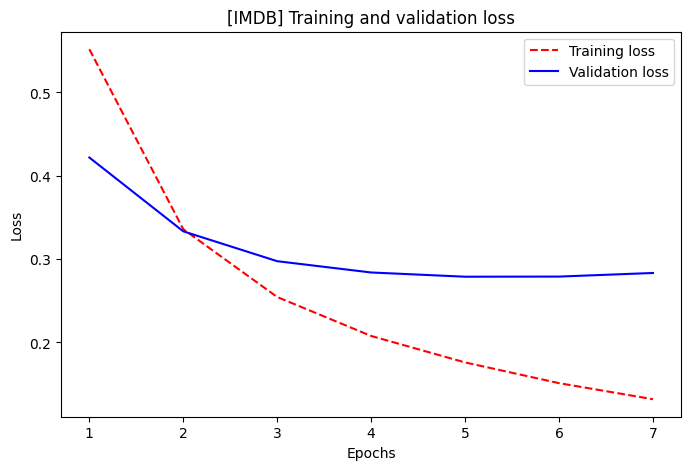

In [58]:
#Plotting the Training and Validation loss Graph
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

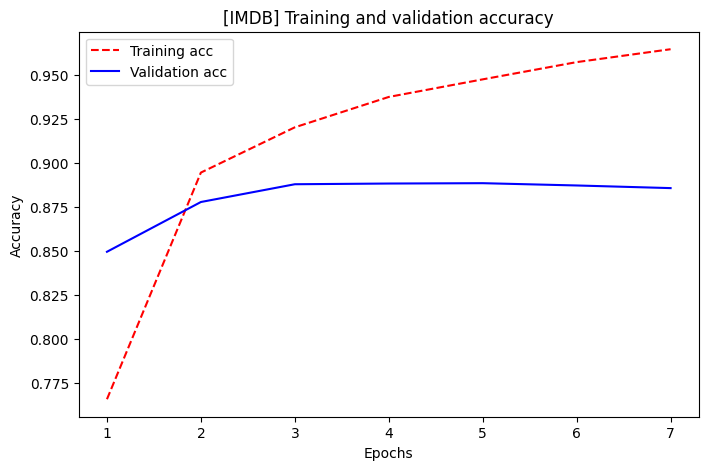

In [59]:
#Plotting the Training and Validation Accuracy Graph
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
#Evaluating the performance on the test data
results1 = model1.evaluate(x_test, y_test)
print("Model 1 Test Accuracy:", results1[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8780 - loss: 0.2976
Model 1 Test Accuracy: 0.8803200125694275


In [61]:
#Predicting performance on test data
model1.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.31579182],
       [0.9982398 ],
       [0.8571882 ],
       ...,
       [0.11411563],
       [0.20215158],
       [0.5387611 ]], dtype=float32)

**Insight:** This model uses one hidden layer with ReLU and binary crossentropy, which works well for classifying positive and negative reviews. The training and validation plots show that the model learns quickly in the first few epochs. After some time, the validation performance stops improving, which means the model may start overfitting. Early stopping was used to stop training at the right time and help the model perform well on new data.

In [62]:
#Building model using 3 hidden layers with 32 units activation Tanh and MSE loss function.
model3 = keras.Sequential(
    [
        layers.Dense(32, activation="tanh", input_shape=(10000,)),  # Hidden Layer 1
        layers.Dense(32, activation="tanh",),  # Hidden Layer 2
        layers.Dense(32, activation="tanh",),  # Hidden Layer 3
        layers.Dense(1, activation="sigmoid"), # Output Layer
    ]
)


In [63]:
#Compiling the model
model3.compile(
    optimizer="adam",
    loss="mse",
    metrics=["accuracy"]
)

In [64]:
#Validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [65]:
history = model3.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7347 - loss: 0.1828 - val_accuracy: 0.8830 - val_loss: 0.0865
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9273 - loss: 0.0570 - val_accuracy: 0.8854 - val_loss: 0.0865
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9630 - loss: 0.0321 - val_accuracy: 0.8769 - val_loss: 0.0917
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9782 - loss: 0.0217 - val_accuracy: 0.8740 - val_loss: 0.0984
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9869 - loss: 0.0141 - val_accuracy: 0.8701 - val_loss: 0.1058
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9901 - loss: 0.0109 - val_accuracy: 0.8718 - val_loss: 0.1068
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9919 - loss: 0.0086 - val_accuracy: 0.8705 - val_loss: 0.1106
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9906 - loss: 0.0098 - val_accuracy: 0.8690 - v

In [66]:
history_dict = history.history
metrics = history_dict.keys()
print(metrics)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [67]:
history_dict = history.history

final_train_acc = history_dict['accuracy'][-1]
final_val_acc = history_dict['val_accuracy'][-1]

print("Final Training Accuracy:", final_train_acc)
print("Final Validation Accuracy:", final_val_acc)

Final Training Accuracy: 0.9911999702453613
Final Validation Accuracy: 0.8610000014305115


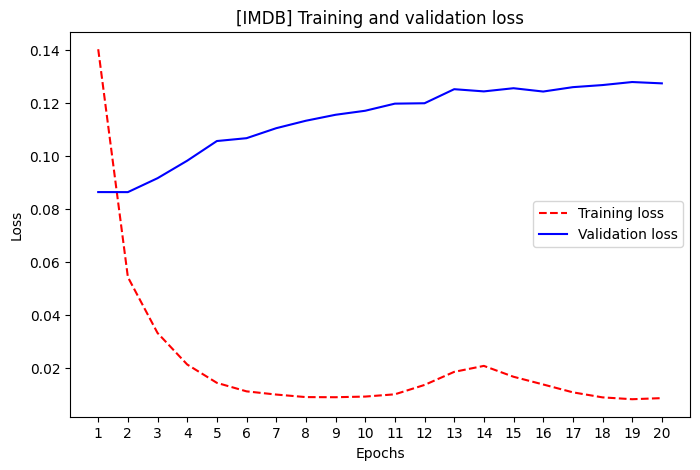

In [68]:
#Plotting the Training and Validation Loss Graph
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

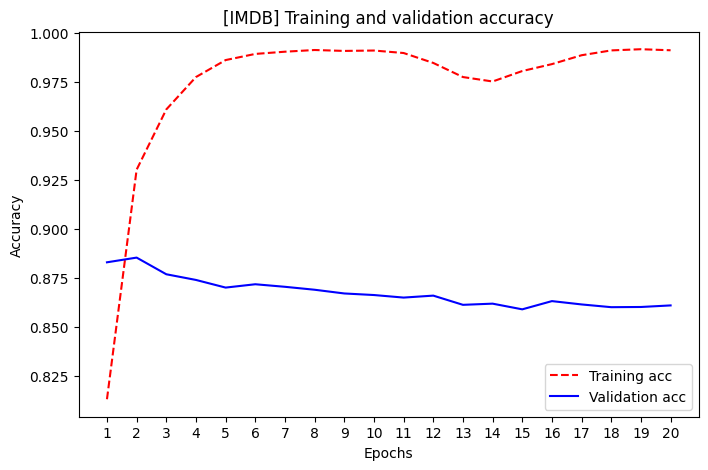

In [69]:
#Plotting the Training and Validation Accuracy Graph
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:
#Evaluating the performance on test data
results3 = model3.evaluate(x_test, y_test)
print("Model 3 Test Accuracy:", results3[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8442 - loss: 0.1420
Model 3 Test Accuracy: 0.8474000096321106


In [71]:
#Predicting the performance on test data
model3.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[1.4237012e-03],
       [9.9992985e-01],
       [9.9987590e-01],
       ...,
       [5.1908643e-04],
       [6.2949688e-04],
       [9.9790025e-01]], dtype=float32)

**Insight:** In this model, the depth of the network is increased by using three hidden layers with 32 units each. Tanh activation and MSE loss were used, which are not ideal for binary classification problems. As a result, the model did not perform better than the simpler model with one hidden layer, ReLU activation, and binary crossentropy loss. The additional layers increased model complexity, but the improvement in performance was limited. From the loss and accuracy plots, we can see that the training performance continued to improve while the validation performance stopped improving after a few epochs. This indicates the beginning of overfitting, where the model starts memorizing the training data instead of learning general patterns. Therefore, increasing depth alone does not guarantee better accuracy and may increase the risk of overfitting.

In [72]:
#Preparing for 2 hidden layers with 64 units activation Tanh and Binary_Crossentropy loss function.

model4 = keras.Sequential([

    layers.Dense(
        64,
        activation="relu",
        input_shape=(10000,),
        kernel_regularizer=regularizers.l2(0.001)   # L2 Regularization
    ),

    layers.Dropout(0.5),   # Dropout layer

    layers.Dense(
        64,
        activation="relu",
        kernel_regularizer=regularizers.l2(0.001)
    ),

    layers.Dropout(0.5),   # Dropout layer

    layers.Dense(1, activation="sigmoid")   # Output layer
])
#Compiling the model
model4.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [73]:
#Validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [74]:
history = model4.fit(
    partial_x_train,
    partial_y_train,
    epochs=5,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6254 - loss: 0.7978 - val_accuracy: 0.8514 - val_loss: 0.5121
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8637 - loss: 0.4815 - val_accuracy: 0.8876 - val_loss: 0.4001
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9207 - loss: 0.3498 - val_accuracy: 0.8906 - val_loss: 0.3862
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9393 - loss: 0.2947 - val_accuracy: 0.8881 - val_loss: 0.3957
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9516 - loss: 0.2580 - val_accuracy: 0.8840 - val_loss: 0.4055


In [75]:
history_dict = history.history
metrics = history_dict.keys()
print(metrics)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [76]:
history_dict = history.history

final_train_acc = history_dict['accuracy'][-1]
final_val_acc = history_dict['val_accuracy'][-1]

print("Final Training Accuracy:", final_train_acc)
print("Final Validation Accuracy:", final_val_acc)

Final Training Accuracy: 0.9509333372116089
Final Validation Accuracy: 0.8840000033378601


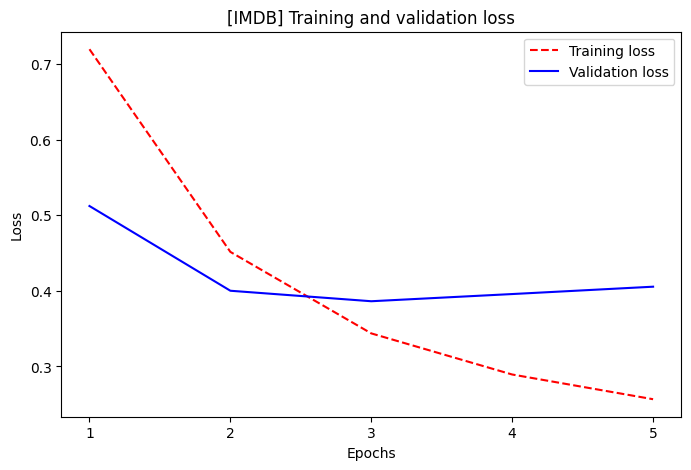

In [77]:
#Plotting the Training and Validation Loss Graph
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

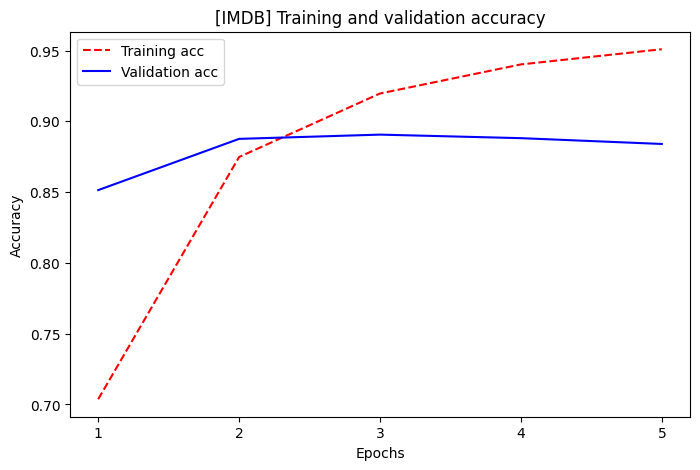

In [78]:
#Plotting Training and Validation Accuracy Graph
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
#Evaluating the performance on test data
results4 = model4.evaluate(x_test, y_test)
print("Model 4 (Regularized + Dropout) Test Accuracy:", results4[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8727 - loss: 0.4247
Model 4 (Regularized + Dropout) Test Accuracy: 0.8773999810218811


In [80]:
#Predicting performance on test data
model4.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.18587433],
       [0.99973094],
       [0.9751131 ],
       ...,
       [0.0398401 ],
       [0.0482518 ],
       [0.7243839 ]], dtype=float32)

**Insight:** In this last model, the depth of the network used is two hidden layers with 64 units each. ReLU activation and binary crossentropy loss were used, which are appropriate for binary classification. Although training accuracy improved, the test accuracy did not improve significantly. The plots show that training performance continued to increase while validation performance improved only slightly, indicating possible overfitting as the number of parameters increased. To reduce overfitting, regularization and dropout were applied. L2 regularization helps control large weight values, while dropout randomly deactivates some neurons during training, forcing the model to learn more general patterns instead of memorizing the training data. As seen in the validation curves, these techniques helped stabilize the model and improve generalization. This demonstrates that increasing model size alone does not guarantee better performance, and controlling complexity is important for achieving better results.

In [84]:
#Creating a table comparing the perfomance of the three model where different acitivation and loss functions are used.

results_table = pd.DataFrame({
    "Model": [
        "1 Hidden Layer (ReLU, BCE)",
        "3 Hidden Layers (32 units, tanh, MSE)",
        "2 Hidden Layers (64 units, ReLU, BCE)"
    ],
    "Test Accuracy": [
        results1[1],
        results3[1],
        results4[1]
    ]
})

results_table


,Model,Test Accuracy
0,"1 Hidden Layer (ReLU, BCE)",0.88032
1,"3 Hidden Layers (32 units, tanh, MSE)",0.84740
2,"2 Hidden Layers (64 units, ReLU, BCE)",0.87740


**Overall Summary based on Comparison Table:** The results show that the simple one-hidden-layer model performed best. Increasing layers and units did not significantly improve test accuracy. Using MSE instead of binary crossentropy reduced performance. Larger models showed signs of overfitting, while regularization and dropout helped control complexity. This confirms that simpler models can sometimes generalize better than complex ones.